In [3]:
%cd '..'

/home/dsi/toozig/Deep-learning-RNA-binding/utils


/home/dsi/toozig/.virtualenvs/deepBindEnv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
result_path = '/home/dsi/toozig/Deep-learning-RNA-binding/data/final/model_eval'

train_color = '#7CB342'
# use purple pastel color
test_color = '#616161'
# test_color = '#FFAB40'



import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json



In [13]:
files = [f'{result_path}/{f}' for f in os.listdir(result_path) if f.endswith('.json')]

test_evals = {}
train_evals = {}

for f in files:
    with open(f, 'r') as file:
        prot = f.split('/')[-1].split('_')[0]
        if int(prot.split('P')[-1]) < 39:
            train_evals[prot] = json.load(file)
        else:
            test_evals[prot] = json.load(file)

In [17]:
train_evals

{'RBP24': {'test_loss': 0.08089615404605865,
  'test_pearson': 0.6832637190818787,
  'val_loss': [0.08317157626152039,
   0.08241984993219376,
   0.08193130046129227,
   0.08119256049394608,
   0.08293337374925613,
   0.0812111496925354,
   0.08114679902791977,
   0.08080604672431946,
   0.08138562738895416,
   0.08040791004896164,
   0.08258187025785446,
   0.08136650174856186,
   0.0813799500465393],
  'val_pearson': [0.6751118898391724,
   0.6835731863975525,
   0.6848306655883789,
   0.685966968536377,
   0.6843729019165039,
   0.684748649597168,
   0.6847829818725586,
   0.6862730979919434,
   0.6848368644714355,
   0.688266932964325,
   0.6856490969657898,
   0.6864133477210999,
   0.6874542832374573],
  'train_loss': [0.088261179625988,
   0.08312206715345383,
   0.08211871981620789,
   0.08173932135105133,
   0.08157342672348022,
   0.08160118013620377,
   0.08141207695007324,
   0.08117301017045975,
   0.0811241939663887,
   0.0810522735118866,
   0.08097200840711594,
   0.081

In [36]:
train_evals

{'RBP24': {'test_loss': 0.08089615404605865,
  'test_pearson': 0.6832637190818787,
  'val_loss': [0.08317157626152039,
   0.08241984993219376,
   0.08193130046129227,
   0.08119256049394608,
   0.08293337374925613,
   0.0812111496925354,
   0.08114679902791977,
   0.08080604672431946,
   0.08138562738895416,
   0.08040791004896164,
   0.08258187025785446,
   0.08136650174856186,
   0.0813799500465393],
  'val_pearson': [0.6751118898391724,
   0.6835731863975525,
   0.6848306655883789,
   0.685966968536377,
   0.6843729019165039,
   0.684748649597168,
   0.6847829818725586,
   0.6862730979919434,
   0.6848368644714355,
   0.688266932964325,
   0.6856490969657898,
   0.6864133477210999,
   0.6874542832374573],
  'train_loss': [0.088261179625988,
   0.08312206715345383,
   0.08211871981620789,
   0.08173932135105133,
   0.08157342672348022,
   0.08160118013620377,
   0.08141207695007324,
   0.08117301017045975,
   0.0811241939663887,
   0.0810522735118866,
   0.08097200840711594,
   0.081

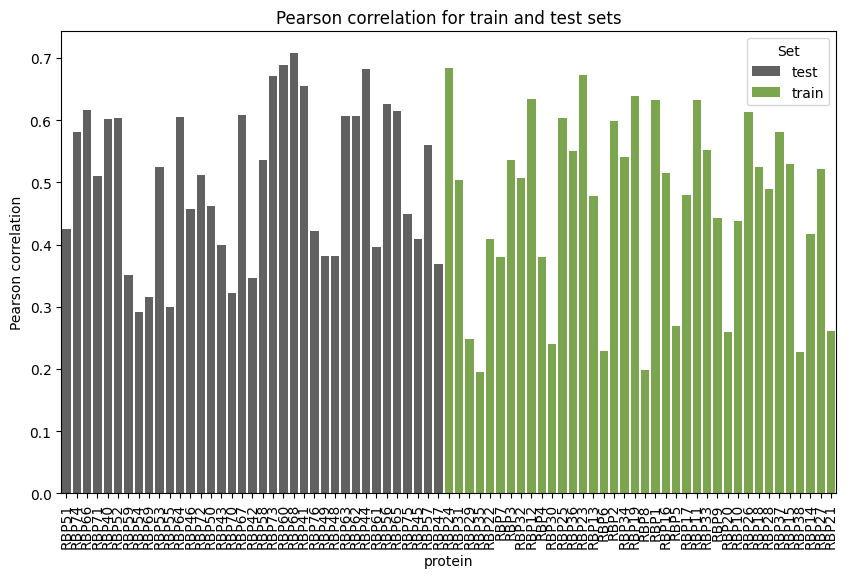

In [44]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# create val_loss bar plot, color by train and test
train_color = '#7CB342'  # rgb(124, 179, 66)
test_color = '#616161'   # rgb(97, 97, 97)

plt.figure(figsize=(10, 6))

# Assuming train_evals and test_evals are dictionaries with 'test_pearson' lists
train_pearson = {prot: evals['test_pearson'] for prot, evals in train_evals.items()}
test_pearson = {prot: evals['test_pearson'] for prot, evals in test_evals.items()}
# plot bar plot for train and test
import pandas as pd
res_df = pd.DataFrame(test_pearson, index=['pearson_corr']).T
res_df['label'] = 'test'
res_df2 = pd.DataFrame(train_pearson, index=['pearson_corr']).T
res_df2['label'] = 'train'
res_df = pd.concat([res_df, res_df2])
res_df = res_df.reset_index()
res_df = res_df.rename(columns={'index': 'protein'})

sns.barplot(data=res_df.dropna(), x='protein', y='pearson_corr', hue='label', palette=[test_color, train_color])
plt.xticks(rotation=90)
plt.ylabel('Pearson correlation')
plt.title('Pearson correlation for train and test sets')
plt.legend(title='Set')
plt.show()


          set    MSE
0  validation  0.102
1        test  0.113
2       train  0.102


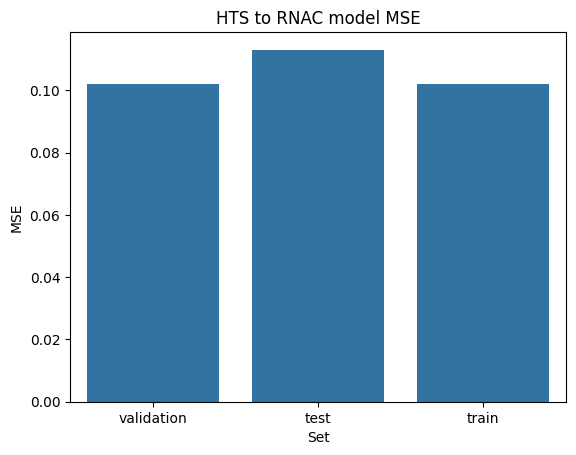

In [8]:
HTS_to_HTS_result = {'validation': 0.102, 'test': 0.113, 'train': 0.102}

# plot bar plot for train and test
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
res_df = pd.DataFrame(HTS_to_HTS_result, index=['MSE']).T
res_df
res_df = res_df.reset_index()
res_df = res_df.rename(columns={'index': 'set'})

sns.barplot(data=res_df.dropna(), x='set', y='MSE')
plt.ylabel('MSE')
plt.xlabel('Set')
plt.title('HTS to RNAC model MSE')

print(res_df.to_string())

In [25]:
# bar plot of the pearson correlation coefficient
train_pearson = [evals['pearson'] for evals in train_evals.values()]

test_pearson = [evals['pearson'] for evals in test_evals.values()]

plt.figure(figsize=(7, 5))
plt.bar(range(len(train_pearson)), train_pearson, color=train_color, label='Train proteins (RBP1-38)')
plt.bar(range(len(test_pearson)), test_pearson, color=test_color, label='Test proteins (RBP39-76)')
plt.title('HTS models Pearson correlation coefficient')
plt.xlabel('Protein')
plt.ylabel('Pearson correlation coefficient')
plt.legend()
plt.show()


KeyError: 'pearson'